# Jarvis Miller
# SI 650 HW 1

# Question 1

### Part A
- Precision: 8/16 = .5
- Recall: 8/10 = .4
- MAP: (1 + 2/3 + 3/5 + 4/6 + 5/10 + 6/11 + 7/14 + 8/10 + 0 + 0) / 10 = .52788
- $F_{1} = \frac{2PR}{P+R} =  \frac{2*.5*.8}{.13}$ = .615385


### Part B
- CG = 2 + 2 + 1 + 1 + 2 = 8
- DCG = $2 + 0 + \frac{2}{log_{2}(3)} + 0 + \frac{1}{log_{2}(5)} + \frac{1}{log_{2}(6)} + 0 + 0 + 0 + \frac{2}{log_{2}(10)}$ = 4.68145 
- nDCG = $\frac{DCG}{IDCG} = \frac{4.68145}{6.19254} = 0.6023166$
    - Where IDCG = $2 + \frac{2}{log_{2}(2)} + \frac{2}{log_{2}(3)} + \frac{2}{log_{2}(4)} + \frac{1}{log_{2}(5)}+ \frac{1}{log_{2}(6)} + \frac{1}{log_{2}(7)} + \frac{1}{log_{2}(8)} = 7.77$ 

# Question 2

#### Part A
| Y|P(H=1;Y)| P(U=1;Y) | P(L=1;Y)| P(Y) |
|----: | ------ |:--------:| -------:|-----:|
| 1| 0.667   | 0.833    | .33     | .5   |
| 0| 0.333  | .5       |   .33    | .5  |


#### Part B
$P(Y=1|H=0, U=1, L=0) = \frac{P(Y=1)P(H=0|Y=1)P(U=1|Y=1)P(L=0|Y=1)}{P(H=0, U=1, L=0|Y=0)P(Y=0) + P(H=0, U=1, L=0|Y=1)P(Y=1)}$
$= \frac{.092} {.5(1-.33)(.5)(1-.33) + (1-.67)(.833)(1-.33).5} = .379$

Similarly, $P(Y=0|H=0, U=1, L=0) = \frac{P(Y=0)P(H=0|Y=0)P(U=1|Y=0)P(L=0|Y=0)} {.5(1-.33)(.5)(1-.33) + (1-.67)(.833)(1-.33).5} = 0.4574827$

Based on this, we should not classify the message as spam

#### Part C
The results are the not the same. This is because we are going directly by the table and ignoring conditional probability. The number of times that we have the event $H=0, U=1, L=0$ is twice. One is when $Y=1$ and the other when $Y=0$. Thus, going by the 12 examples ignoring the conditional independence, $P(Y=1|H=0, U=1, L=0) = \frac{1}{2} = P(Y=0|H=0, U=1, L=0)$ This essentially "squeezes" these events together, whereas with part b, if we knew a value of y and a value of H, we didn't necessarily know the value of U or L. So the probabilities are different.


#### Part D
You have to follow the properties of a probability measure. For example, 
$P(H=0, U=1, L=0) = P(H=0, U=1, L=0|Y=0) + P(H=0, U=1, L=0|Y=1)$
$= P(H=0|Y=0)P(U=1|Y=0)P(L=0|Y=0) + P(H=0|Y=1)P(U=1|Y=1)P(L=0|Y=1)$

If we put all values = .999, then the sum would be greater than one. But $P:\Omega \to [0,1]$ so probabilities can't have a value greater than 1

#### Part E
Sure, make H=0 in row 2. This makes 

$P(Y=1|H=0, U=1, L=0) \frac{P(Y=1, H=1, U=1, L=0)}{P(H=0, U=1, L=0|Y=0) + P(H=0, U=1, L=0|Y=0)}$
$= \frac{0.1388889} {(2/3)(1/2)(2/3) + (1/2)(5/6)(2/3)} = .277$

But, for $P(Y=0|H=0, U=1, L=0)$, the numerator is $0.1111111$ and the denominator is the same as above, so $P(Y=1|H=0, U=1, L=0) > P(Y=0|H=0, U=1, L=0)$ meaning we categorize as spam

#### Part F
We would need 15 specifications, For $Y = 0$, we have U, L, H $\in$ {0,1}, So there are $2^3 = 8$ different combinations. Same for $Y = 1$ hence there are 16 specifications for $P(H, U, L| Y)$. However, probabilities must add to one so we can find the 16th using 1-sum(15 specified probabilities). 

#### Part F
Just because if you know whether a message is a spam or not, the event of a local number and the event of a long message isn't necessarily independent. Spam messages can come from local and non local numbers and be short or long, same for nonspam messages.

# Question 3

## Context
In this exercise, we are going to get our hands dirty and play with some data in the wild. Download two
collections from Canvas, ehr.txt and medhelp.txt. The first collection are sampled electronic health
records (de-identified) released in TREC CDS 2016, with 90 documents in total. The second collection are
sampled forum posts downloaded from MedHelp, with 180 documents in total. In both files, each line represents
a document. You can also find a stopword list in stoplist.txt.

In [1]:
import nltk
from collections import Counter
import string
import matplotlib.pyplot as plt
from six import text_type
import numpy as np

nltk.download('punkt')
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')

with open('ehr.txt') as f:
    ehr = f.read()
with open('medhelp.txt') as f:
    medhelp = f.read()
with open('stoplist.txt') as f:
    stoplist = f.read().splitlines()
punc = set(string.punctuation)


[nltk_data] Downloading package punkt to /Users/jarvm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jarvm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jarvm/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Part 1
Tokenize the text (e.g. use the nltk.word_tokenize() function in the NLTK package)
and compute the frequency of words. Then, plot the frequency distribution of words in each collection after the
removal of the stopwords: x-axis - word frequency (number of times a word appears in the collection); y-axis
-proportion of words with this frequency. Plot the distributions on a log-log scale. Does each plot look like a
power-law distribution? Are the two distributions similar or different?

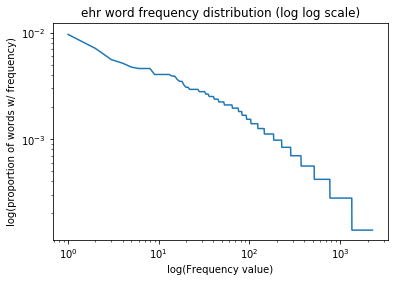

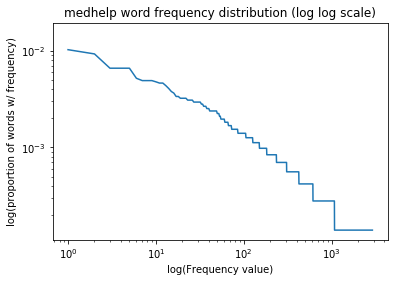

In [2]:
ehr_words = nltk.word_tokenize(ehr.lower())
med_words = nltk.word_tokenize(medhelp.lower())

# remove puncuation
ehr_words = [word for word in ehr_words if word not in punc]
med_words = [word for word in med_words if word not in punc]



def plt_freq_dist(text, **kwargs):
    title  = kwargs.pop( 'title'  )
    xlabel = kwargs.pop( 'xlabel' )
    ylabel = kwargs.pop( 'ylabel' )
    important_words = [word for word in text if word not in stoplist]
    fdist = Counter(important_words)
    samples = [item for item, _ in fdist.most_common()]
    freqs = [fdist[sample] for sample in samples]
    plt.loglog(np.array(freqs)/np.sum(freqs), **kwargs)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

enh_labs = {'title': 'ehr word frequency distribution (log log scale)', "xlabel": 'log(Frequency value)', 'ylabel': 'log(proportion of words w/ frequency)'}
medhelp_labs = {'title': 'medhelp word frequency distribution (log log scale)', "xlabel": 'log(Frequency value)', 'ylabel': 'log(proportion of words w/ frequency)'}


plt_freq_dist(ehr_words, **enh_labs)
plt_freq_dist(med_words, **medhelp_labs)



### Discussion
The distributions look similar. In the medhelp document, the max log(proprotion of words with frequency) is greater than that of ehr. I decided to only use the punctuation in the string argument. This means that there are certain things such as '...' that aren't removed. Also, I did not combine certains combinations of words (list vs lists are treated separately). Lastly, I included both part of separated contractions (can't becomes can and 't'. I keep both). In order to keep as much of the raw data as possible since this is more of an exploratory assignment. 

## Part 2
Now compare the two collections more rigorously. Report the following properties of each
collection. Can you explain these differences based on the nature of the two collections? (20 points) (You can
use the nltk.pos tag() function of the NLTK package for part of speech tagging.)
- (a) frequency of stopwords (percentage of the word occurrences that are stopwords.);
- (b) percentage of capital letters;
- (c) average number of characters per word;
- (d) percentage of nouns, adjectives, verbs, adverbs, and pronouns;
- (e) the top 10 nouns, top 10 verbs, and top 10 adjectives

#### frequency of stopwords
I split each document by spaces, then accumulated the number or occurrences of each stopword in the given stoplist

In [3]:
# enh text
counter_ehr = 0
counter_medhelp = 0
ehrsplit = ehr.lower().split()
medsplit = medhelp.lower().split()
for stopword in stoplist:
    counter_ehr += ehrsplit.count(stopword)
    counter_medhelp += medsplit.count(stopword)
print("enh frequency of stopwords:", str(counter_ehr / len(ehrsplit)))
print("medhelp frequency of stopwords:", str(counter_medhelp / len(medsplit)))


enh frequency of stopwords: 0.34723595505617977
medhelp frequency of stopwords: 0.5401267490744808


#### percentage of capital letters

For this, I found each capital letter using the *re* module. The denominator is the length of the document minus the number of spaces in the letter. This is an estimate of the total number of letters in the document

In [4]:
import re
print("percentage of capital letters in ehr:", len(re.findall('[A-Z]',ehr)) / (len(ehr) - ehr.count(' ')) * 100)
print("percentage of capital letters in medhelp:", len(re.findall('[A-Z]', medhelp)) / (len(medhelp) - medhelp.count(' ')) * 100)

percentage of capital letters in ehr: 6.235090188271234
percentage of capital letters in medhelp: 3.2856877668461113


#### average number of characters per word

In [5]:
import numpy as np

ehr_word_len = np.asarray([len(word) for word in ehr_words])
med_word_len = np.asarray([len(word) for word in med_words])
 
print("average number of chars per word for enh:", ehr_word_len.mean())
print("average number of chars per word for medhelp:", med_word_len.mean())


average number of chars per word for enh: 5.00260416667
average number of chars per word for medhelp: 4.14757092414


#### percentage of nouns, adjectives, verbs, adverbs, and pronouns;

In [6]:
def pos_dict(word_tokens):
    word_dict = {}
    pos_tokens = nltk.pos_tag(word_tokens)
    d = {"RB":0, "JJ": 0, "NN": 0, "PRP":0, "VB":0}

    def build_dict(item, category):
            d[category] += 1
            try:
                word_dict[category].append(item[0])
            except:
                word_dict[category] = []

    for item in pos_tokens:
        if "RB" in item[1]:
            build_dict(item, "RB")
        elif "JJ" in item[1]:
            build_dict(item, "JJ")
        elif "NN" in item[1]:
            build_dict(item, "NN")
        elif "PRP" in item[1]:
            build_dict(item, "PRP")
        elif "WP" in item[1]: # same as PRP
            build_dict(item, "PRP")
        elif "VB" in item[1]:
            build_dict(item, "VB")
        else:
            pass
    return d, word_dict


In [7]:
ehr_pos_dict, ehr_pos_words = pos_dict(ehr_words)
ehr_len = len(ehr_words)
for key, val in ehr_pos_dict.items():
    print("perc of %s in ehr is:" %key, val/ehr_len * 100)
print('\n')
medhelp_len = len(med_words)
med_pos_dict, med_pos_words = pos_dict(med_words)
for key, val in med_pos_dict.items():
    print("perc of {0} in medhelp is:".format(key), val/medhelp_len * 100)


perc of RB in ehr is: 3.708692528735632
perc of JJ in ehr is: 15.445402298850574
perc of NN in ehr is: 31.573275862068968
perc of PRP in ehr is: 4.014008620689656
perc of VB in ehr is: 15.777658045977011


perc of RB in medhelp is: 8.297820528430536
perc of JJ in medhelp is: 9.101424570802386
perc of NN in medhelp is: 21.472056495799343
perc of PRP in medhelp is: 8.91269937903324
perc of VB in medhelp is: 21.48423231462316


#### the top 10 nouns, top 10 verbs, and top 10 adjectives

In [8]:
for key, li in ehr_pos_words.items():
    print("top 10 {} words in ehr:\n".format(key), Counter(li).most_common(10))

top 10 NN words in ehr:
 [('pain', 67), ('patient', 66), ('pt', 42), ('history', 34), ('home', 29), ('blood', 29), ('days', 25), ('breath', 22), ('fibrillation', 21), ('weeks', 21)]
top 10 VB words in ehr:
 [('was', 197), ('is', 72), ('had', 71), ('has', 55), ('given', 28), ('were', 27), ('have', 22), ('found', 22), ('be', 22), ('left', 22)]
top 10 JJ words in ehr:
 [('abdominal', 37), ('atrial', 29), ('right', 23), ('last', 23), ('normal', 19), ('past', 17), ('positive', 17), ('old', 17), ('negative', 16), ('recent', 15)]
top 10 RB words in ehr:
 [('not', 56), ('also', 32), ('then', 16), ('when', 16), ('ago', 14), ('right', 13), ('back', 12), ('recently', 12), ('well', 11), ('prior', 10)]
top 10 PRP words in ehr:
 [('she', 171), ('he', 106), ('her', 90), ('his', 39), ('who', 31), ('it', 4), ('their', 1), ('they', 1), ('him', 1), ('heroin', 1)]


In [9]:
for key, li in med_pos_words.items():
    print("top 10 {} words in medhelp: \n".format(key), Counter(li).most_common(10))

top 10 PRP words in medhelp: 
 [('you', 333), ('it', 265), ('my', 201), ('your', 113), ('me', 84), ('he', 73), ('they', 73), ('what', 56), ('we', 34), ('them', 33)]
top 10 NN words in medhelp: 
 [('i', 342), ('time', 47), ('day', 28), ('people', 23), ('things', 22), ('weeks', 22), ('days', 21), ('pain', 21), ('doctor', 20), ('body', 18)]
top 10 VB words in medhelp: 
 [('is', 232), ('have', 189), ('are', 122), ('be', 117), ('i', 100), ('was', 91), ('do', 90), ('get', 69), ('had', 58), ('am', 57)]
top 10 RB words in medhelp: 
 [("n't", 110), ('not', 109), ('so', 82), ('just', 70), ('very', 53), ('really', 44), ('when', 44), ('then', 37), ('now', 37), ('also', 31)]
top 10 JJ words in medhelp: 
 [('i', 137), ('good', 33), ('sure', 22), ('other', 21), ('more', 20), ('many', 19), ('normal', 17), ('long', 16), ('few', 14), ('better', 14)]


## Part 3
We would like to summarize each document with a few words. However, picking the most
frequently used words in each document would be a bad idea, since they are more likely to appear in other
document as well. Instead, we pick the words with the highest TF-IDF weights in each document.
In this problem, term frequency (TF) and inverse document frequency (IDF) are defined as:
- *TF(t, d) = log(c(t, d) + 1)*
- *IDF(t) = 1 + log(N/k).*

c(t, d) is the frequency count of term t in doc d, N is the total number of documents in the collection, and k is
the document frequency of term t in the collection.
For each of the first 10 documents in the EHR collection, print out the 5 words that have the highest TF-IDF
weights.

Here, I assumed you meant "act as if your collection was only 10 documents long, calculate the tdf for each document" instead of calculate the tdf for each document even though there are 90 and 180 documents total. Thus, $N=10$ for both of my calculations

In [10]:
import math
from textblob import TextBlob as tb

def tf(word, blob):
    return np.log(blob.words.count(word) + 1)

def idf(word, bloblist):
    N = len(bloblist)
    
    def num_occurances(word, bloblist):
        return (sum(1 for blob in bloblist if word in blob.words))
    return 1 + np.log(N / num_occurances(word, bloblist))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

with open('ehr.txt') as f:
    bloblist = [tb(next(f).lower()) for i in range(10)]
    
for i, blob in enumerate(bloblist):
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:5]:
            print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))



Top words in document 1
	Word: some, TF-IDF: 3.62826
	Word: he, TF-IDF: 2.42131
	Word: 78, TF-IDF: 2.28918
	Word: m, TF-IDF: 2.28918
	Word: transferred, TF-IDF: 2.28918
Top words in document 2
	Word: elderly, TF-IDF: 2.28918
	Word: past, TF-IDF: 2.28918
	Word: aortic, TF-IDF: 2.28918
	Word: hyperlipidemia, TF-IDF: 2.28918
	Word: hip, TF-IDF: 2.28918
Top words in document 3
	Word: hypotension, TF-IDF: 3.62826
	Word: pt, TF-IDF: 3.61745
	Word: on, TF-IDF: 3.08415
	Word: she, TF-IDF: 2.93993
	Word: has, TF-IDF: 2.86676
Top words in document 4
	Word: c2, TF-IDF: 3.62826
	Word: fracture, TF-IDF: 3.62826
	Word: when, TF-IDF: 3.62826
	Word: fall, TF-IDF: 3.62826
	Word: patient, TF-IDF: 3.54716
Top words in document 5
	Word: status-post, TF-IDF: 3.62826
	Word: atrial, TF-IDF: 3.61745
	Word: 82, TF-IDF: 2.28918
	Word: man, TF-IDF: 2.28918
	Word: chronic, TF-IDF: 2.28918
Top words in document 6
	Word: stools, TF-IDF: 3.62826
	Word: abdominal, TF-IDF: 3.61745
	Word: she, TF-IDF: 2.43158
	Word: 94

In [11]:
with open('medhelp.txt') as f:
    bloblist = [tb(next(f)) for i in range(10)]
    
for i, blob in enumerate(bloblist):
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:10]:
            print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))



Top words in document 1
	Word: MD, TF-IDF: 3.62826
	Word: Your, TF-IDF: 2.28918
	Word: description, TF-IDF: 2.28918
	Word: sound, TF-IDF: 2.28918
	Word: like, TF-IDF: 2.28918
	Word: regular, TF-IDF: 2.28918
	Word: floater, TF-IDF: 2.28918
	Word: Since, TF-IDF: 2.28918
	Word: new, TF-IDF: 2.28918
	Word: problem, TF-IDF: 2.28918
Top words in document 2
	Word: BP, TF-IDF: 3.62826
	Word: your, TF-IDF: 2.42131
	Word: is, TF-IDF: 2.3472
	Word: certain, TF-IDF: 2.28918
	Word: weight, TF-IDF: 2.28918
	Word: loss, TF-IDF: 2.28918
	Word: want, TF-IDF: 2.28918
	Word: congratulate, TF-IDF: 2.28918
	Word: getting, TF-IDF: 2.28918
	Word: under, TF-IDF: 2.28918
Top words in document 3
	Word: Smoking, TF-IDF: 2.28918
	Word: effect, TF-IDF: 2.28918
	Word: octcome, TF-IDF: 2.28918
	Word: treatment, TF-IDF: 2.28918
	Word: Best, TF-IDF: 1.80872
	Word: will, TF-IDF: 1.52768
	Word: not, TF-IDF: 0.94038
	Word: of, TF-IDF: 0.94038
	Word: you, TF-IDF: 0.94038
	Word: to, TF-IDF: 0.84782
Top words in document 4


## Part 4
As discussed in the class, TF-IDF is a common way to weight the terms in each document. It
can also be easily calculated from the inverted index, since TF can be obtained from the postings and IDF can
be summarized as a dictionary. Could you think of another weighting that cannot be calculated directly from
inverted index? What is the advantage of such a weighting?

You can try to weight words using their pointwise mutual information. This can't be calculated directly from the inverted index because we need a number of co-occurences of words together. This is helpful because it can help determine collocated phrases within documents